### **The Boston Housing Dataset**

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:



*  CRIM - per capita crime rate by town
*   ZN - proportion of residential land zoned for lots over 25,000 sq.ft.


*   INDUS - proportion of non-retail business acres per town.

*   CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

*   NOX - nitric oxides concentration (parts per 10 million)

*   RM - average number of rooms per dwelling
*   List item


*   AGE - proportion of owner-occupied units built prior to 1940

*   DIS - weighted distances to five Boston employment centres
*   RAD - index of accessibility to radial highways


### **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.datasets
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

### **Load Dataet**




In [31]:
from sklearn.datasets import load_boston
boston=load_boston()

In [2]:
#Lets load the dataset and sample some
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
data = pd.read_csv("/content/housing.csv",delim_whitespace=True, names=names)
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 506 data points with 14 variables each.


In [3]:
# let's see data
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### **Exploatroy Data Analysis & Visulazation**

In [4]:
#checking the number of rows and columns in dataframe 
print(data.shape)

(506, 14)


In [5]:
#check missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

No null values

In [6]:
# statistical measure of dataset
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# Get information about DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


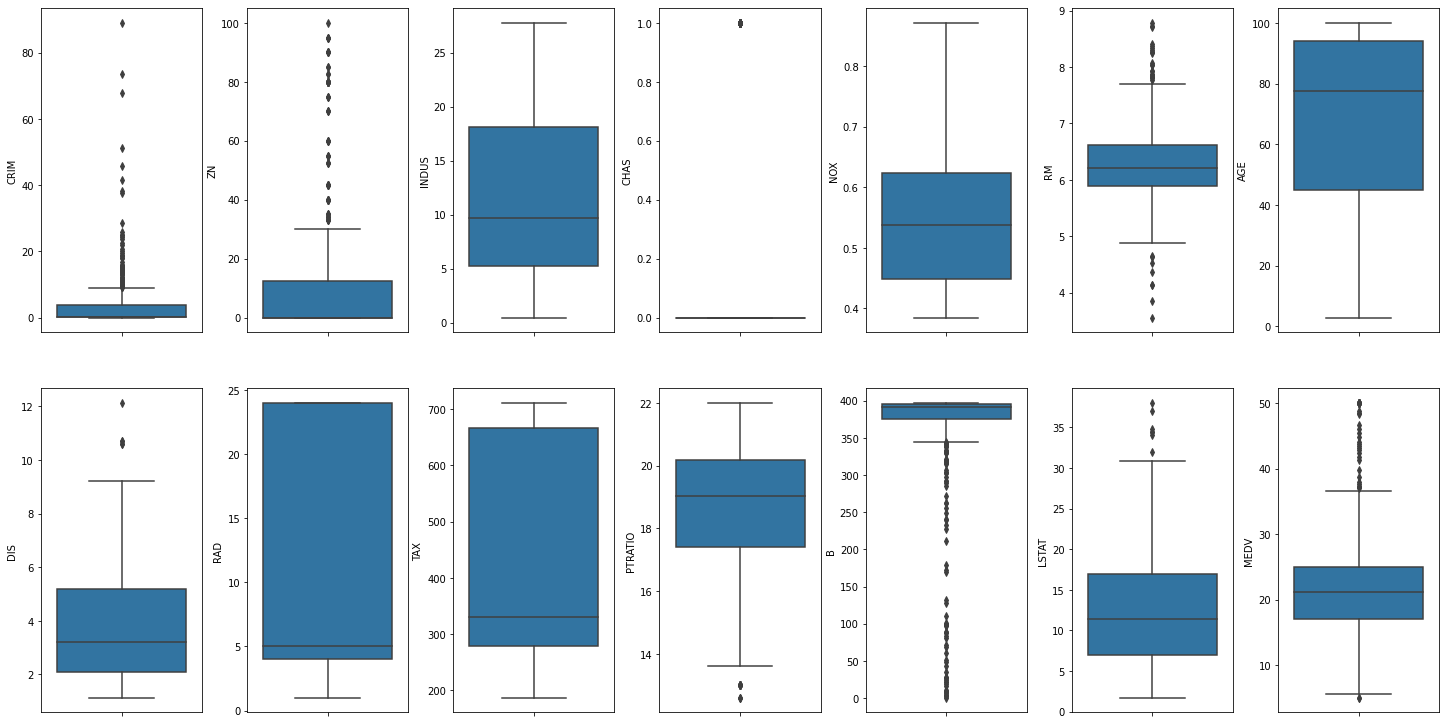

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [8]:
#check outliers
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Almost all the features have many outliners and hence we will need to take care of them and Columns like CRIM, ZN, RM, B seems to have outliers.

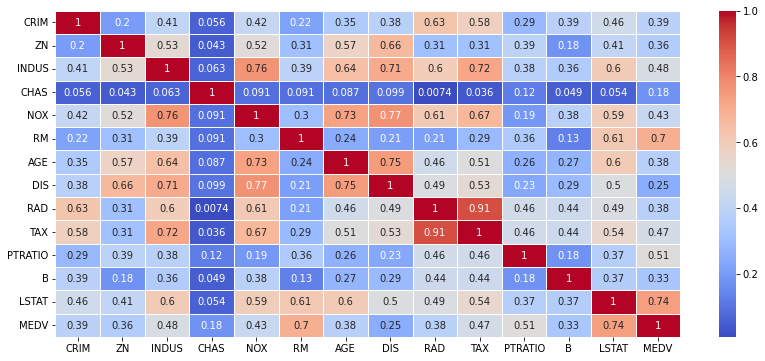

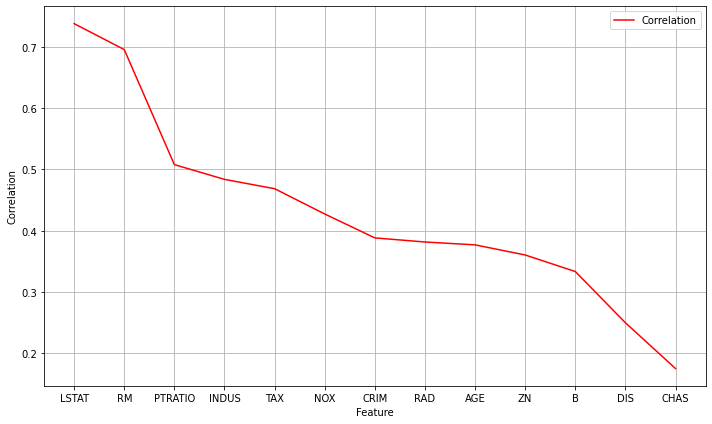

In [9]:
# check correlation
plt.figure(figsize=(14,6))
corr=abs(data.corr())
sns.heatmap(corr,annot=True,linewidth=1,cmap='coolwarm')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(corr["MEDV"].sort_values(ascending=False)[1:],label="Correlation",color="red")
plt.ylabel("Correlation")
plt.xlabel("Feature")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

From correlation matrix, we see TAX and RAD are highly correlated features.

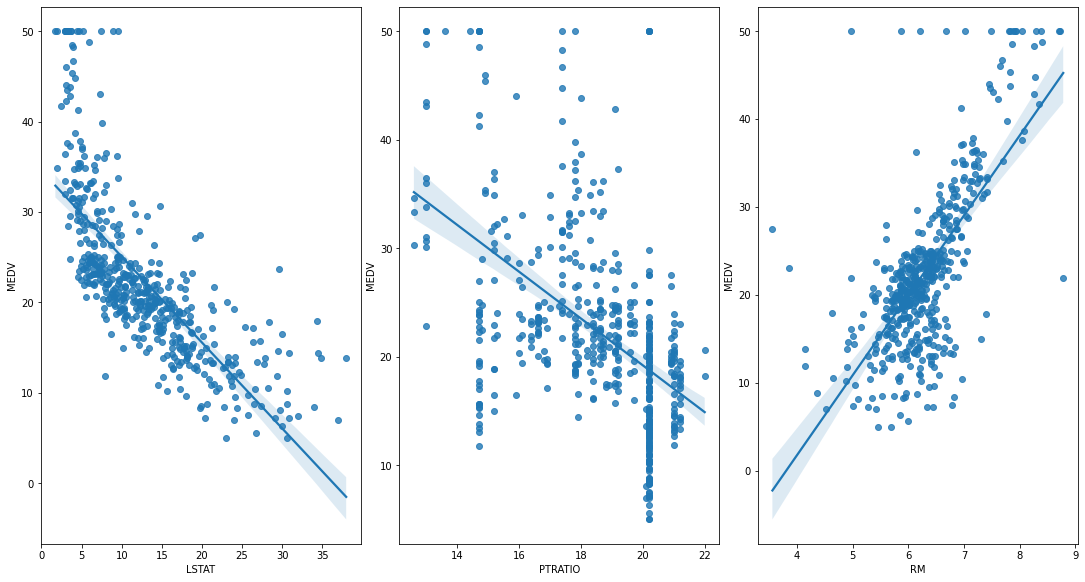

In [10]:
# The columns correlation score above 0.5 with MEDV
column_sels = ['LSTAT', 'PTRATIO', 'RM']
x = data.loc[:,column_sels]
y = data['MEDV']
# creat a figure with multiple subplots
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(15, 8))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)



*   categorical Features



In [11]:
# check 'CHAS' column
data['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

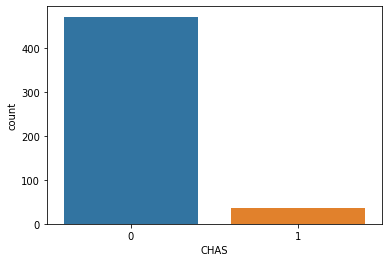

In [12]:
sns.countplot(x = 'CHAS',data = data)
plt.show()

*  0 = no rivers
*   1= rivers at surroundings


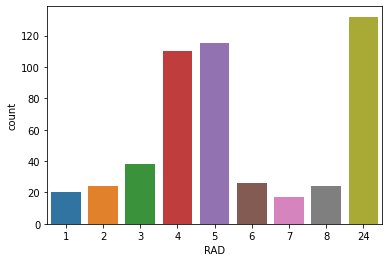

In [13]:
# check 'RAD' column
sns.countplot(x = 'RAD',data = data)
plt.show()

*   Most of the town is not tract bound by charles river.
* Larger the index value, the larger its accessibility to the radial highway. Most of the towns have good accessibility to the radial highway

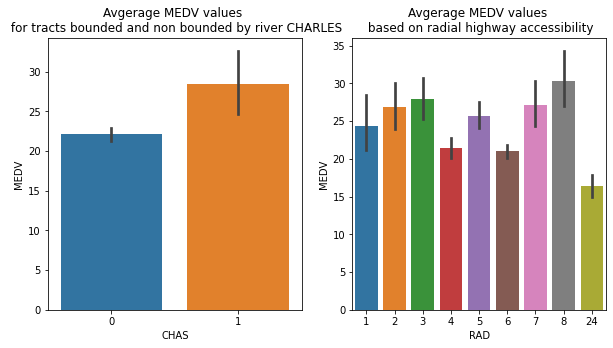

In [14]:
# check 'RAD' & 'CHAS' columns with MEDV
fig, ax = plt.subplots(1,2, figsize = (10,5))
# plot 1
sns.barplot(ax = ax[0], data = data, x = 'CHAS', y = 'MEDV')
ax[0].set_title("Avgerage MEDV values \n for tracts bounded and non bounded by river CHARLES")
# plot 2
sns.barplot(ax = ax[1], data = data, x = 'RAD', y = 'MEDV')
ax[1].set_title("Avgerage MEDV values \n based on radial highway accessibility");


*   **MEDV** for Riverbend areas and the non-bound area is of not much difference but **MEDV** is higher for Riverbend area. This shows people prefer river-bound areas and demand for it.
*   Surprisingly index 24 has a low **MEDV** value.



*   Numerical Features



In [15]:
# get numerical variabels
numerical = []
for i in data.columns:
    if data[i][0].dtype == 'float64':
        numerical.append(i)

In [16]:
print(numerical)

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


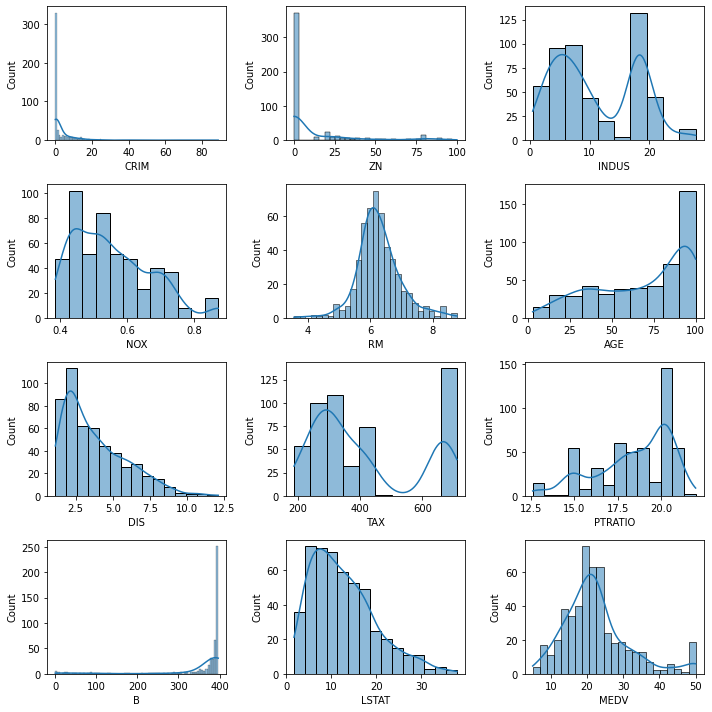

In [17]:
# Define the number of rows and columns for the subplots, and the figure size
fig , ax = plt.subplots(4,3, figsize = (10, 10))
# Initialize row and column indices
i = 0
j = 0
# Loop through each column in the numerical variables
for col in numerical:
# Create a histogram plot for the current column in the current subplot
    sns.histplot(ax = ax[i,j], data = data, x = col, kde = True)
    j += 1
    if j == 3:
        j = 0
        i += 1
fig.tight_layout()

*  most of the houses have **MEDV** in the range of 20-30.
*   Largely skewed in CRIM, ZN, B

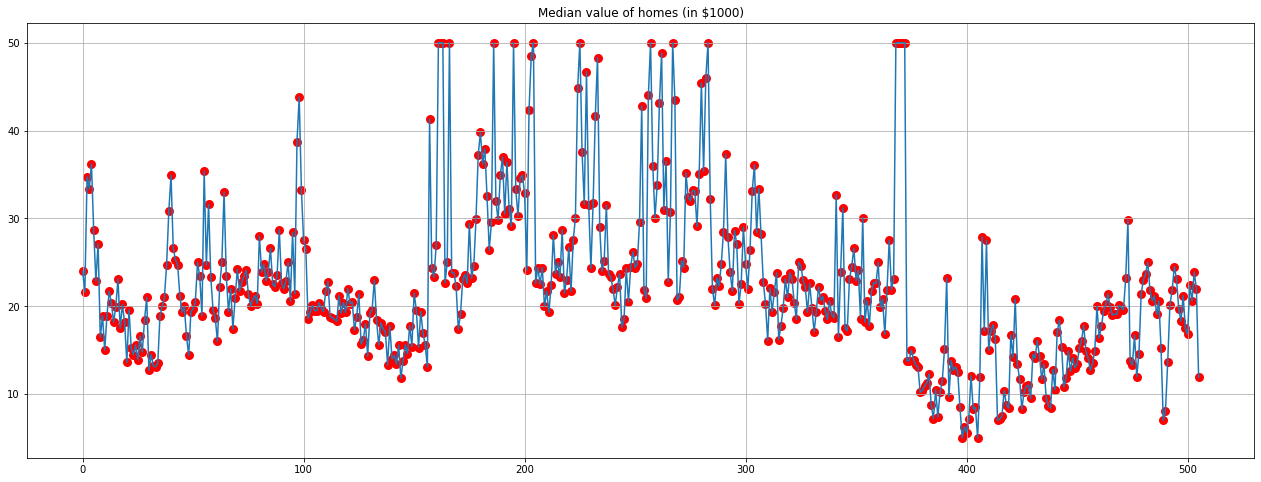

In [18]:
plt.figure(figsize=(22,8))
plt.scatter(data.index,data["MEDV"],color="red",lw=3)
plt.plot(data.index,data["MEDV"])
plt.title("Median value of homes (in $1000)")
plt.grid(True)
plt.show()

As we can see, the values are vastly distributed, there is no real pattern to these values. Most of them lie between the range $(20000-25000)

The maximum value of houses is $50000 while the minimum is somewhere around 5000.

### **Prediction**



 **Splitting Data** 




In [19]:
# drop the 'MEDV' column from the DataFrame to create the feature matrix
x=data.iloc[:,:-1].values
# create the target vector
y=data.iloc[:,-1].values
# split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [20]:
# chech shape of train and test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(354, 13) (152, 13) (354,) (152,)


**Feature scaling**

In [21]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [22]:
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    
    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    return R2, adjusted_r2, CV_R2, RMSE
    
    print('RMSE:', round(RMSE,4))
    print('R2:', round(R2,4))
    print('Adjusted R2:', round(adjusted_r2, 4) )
    print("Cross Validated R2: ", round(cv_score.mean(),4) )

**XGBoost** 

In [23]:
from xgboost import XGBRegressor
# create an xgboost regression model
XGBR =XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.8, colsample_bytree=0.8)




*  Prediction on Train Data



In [24]:
# training the model with x_tain
XGBR.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [25]:
# Model making a prediction on test data
y_pred = XGBR.predict(X_test)

In [26]:
ndf = [Reg_Models_Evaluation_Metrics(XGBR,X_train,y_train,X_test,y_test,y_pred)]
XGBR_score2 = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
XGBR_score2.insert(0, 'Model', 'XGBoost')
XGBR_score2

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,XGBoost,0.901889,0.892646,0.845593,2.70381


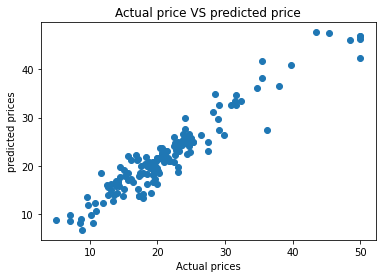

In [27]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual prices')
plt.ylabel('predicted prices')
plt.title ('Actual price VS predicted price')
plt.show()

### **New Data Prediction**

In [32]:
# make predictions on a single row
boston.data[0].reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [33]:
##transformation of new data
sc.transform(boston.data[0].reshape(1,-1))

array([[-0.4274098 ,  0.27027532, -1.32367119, -0.2508726 , -0.09447451,
         0.59143521, -0.09753356,  0.1104133 , -0.99470415, -0.66449292,
        -1.90792389,  0.47107234, -1.14419192]])

In [35]:
XGBR.predict(sc.transform(boston.data[0].reshape(1,-1)))

array([29.961412], dtype=float32)

### **Pickling The Model file For Deployment**

In [36]:
import pickle
# Save the model to a file using pickle.dump
pickle.dump(XGBR,open('model.pkl','wb'))
# Load the saved model 
pickled_model=pickle.load(open('model.pkl','rb'))

In [37]:
## Prediction
pickled_model.predict(sc.transform(boston.data[0].reshape(1,-1)))

array([29.961412], dtype=float32)